Install the required packages


In [ ]:
!pip install corner

Import required packages

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm,uniform
import corner

Load Mock data from GitHub

In [ ]:
z,H,Herr=np.loadtxt("https://raw.githubusercontent.com/darshanbeniwal/Astrophy_Py_STACUP_BDU_CUTN_IUCAA_2023/main/Text_files_Datasets/Hubble_30.txt",unpack=True)

Define Likelihood

In [ ]:
def likelihood(theta, z, H, Herr):
    H_o, omega_m= theta
    model = H_o * np.sqrt(omega_m*(1+z)**3 + 1 - omega_m)
    return (np.sum(-0.5*((H-model)/Herr)**2-0.5*np.log(2*np.pi*Herr**2)))

Define Prior

In [ ]:
def prior(theta):
    H_o, omega_m= theta
    if 50.0< H_o < 80.0 and 0.15 < omega_m < 0.45:
        return np.log10(1.0 / ((80.0 - 50.0) * (0.45 - 0.15)))
    return -np.inf

Define Posterior

In [ ]:
def posterior(theta, z, H, Herr):
    lp = prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return (lp + likelihood(theta, z, H, Herr))

Define Metropolis-Hastings Algorithm

In [ ]:
def Metropolis_Hastings(parameter_init, nsteps):
    result = []  # List to store the sampled parameter values
    result.append(parameter_init)  # Add the initial parameter values to the result list
    for t in range(nsteps):  # Iterate over the specified number of steps
        step_var = [1.0, 0.1]  # Variance of the proposal distribution for each parameter
        proposal = norm.rvs(loc=result[-1], scale=step_var)  # Generate a proposal parameter value from a normal distribution
        probability = np.exp(posterior(proposal,z,H,Herr) - posterior(result[-1],z,H,Herr))  # Calculate the acceptance probability
        if (uniform.rvs() < probability):  # Accept the proposal with the acceptance probability
            result.append(proposal)  # Add the proposal to the result list
        else:
            result.append(result[-1])  # Reject the proposal and add the previous parameter value to the result list
    return(result)  # Return the sampled parameter values

In [ ]:
H_o_ini, omega_m_ini=60.0, 0.25
initials=H_o_ini, omega_m_ini
ndim=2
nsteps=300000

In [ ]:
result = Metropolis_Hastings(initials, nsteps)
samples_MH=np.array(result)

Text(0, 0.5, '$\\Omega_{mo}$')

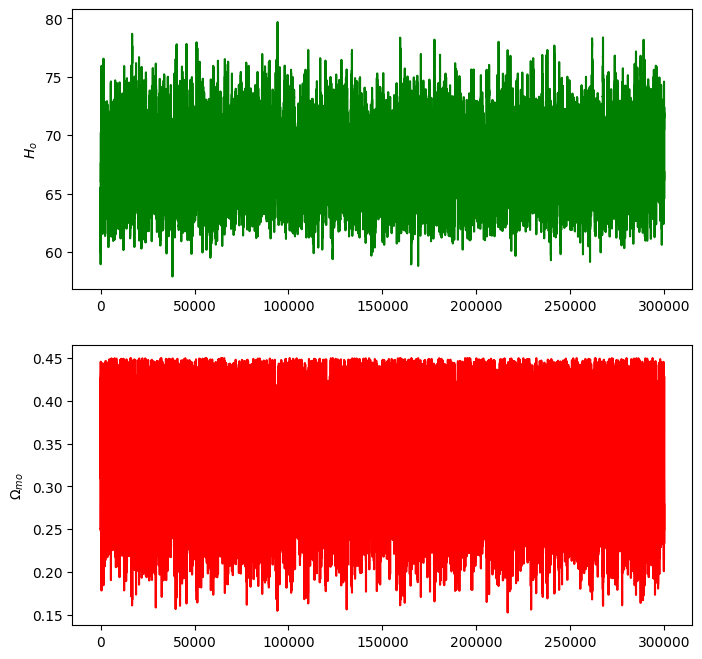

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples = samples_MH.T

# Plot the traceplot of H0
axes[0].plot(samples[0], "g")
axes[0].set_ylabel("$H_o$")

# Plot the traceplot of Om
axes[1].plot(samples[1], "r")
axes[1].set_ylabel("$\Omega_{mo}$")

(0.0, 1000.0)

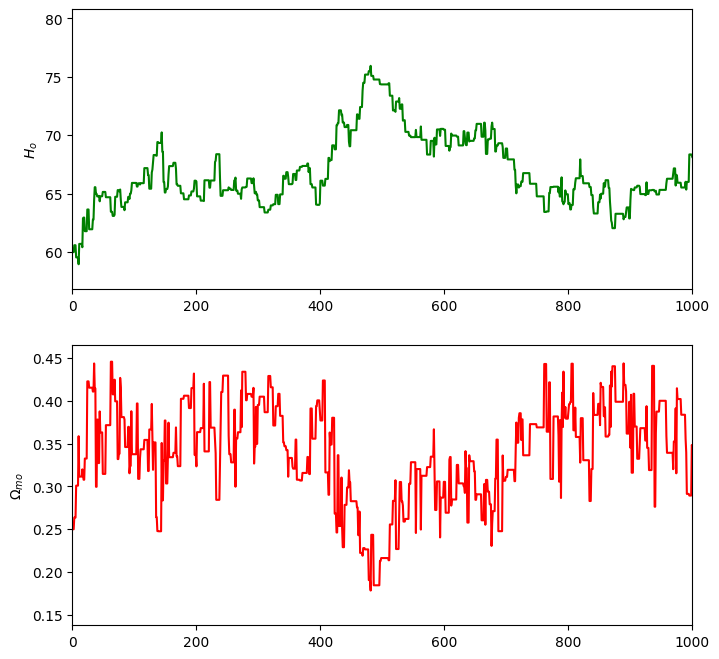

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples = samples_MH.T

# Plot the traceplot of H0
axes[0].plot(samples[0], "g")
axes[0].set_ylabel("$H_o$")
axes[0].set_xlim(0,1000)

# Plot the traceplot of Om
axes[1].plot(samples[1], "r")
axes[1].set_ylabel("$\Omega_{mo}$")
axes[1].set_xlim(0,1000)

In [ ]:
nburn_in=8000
result_b = result[nburn_in:]
samples_MH_b=np.array(result_b)

Text(0, 0.5, '$\\Omega_{mo}$')

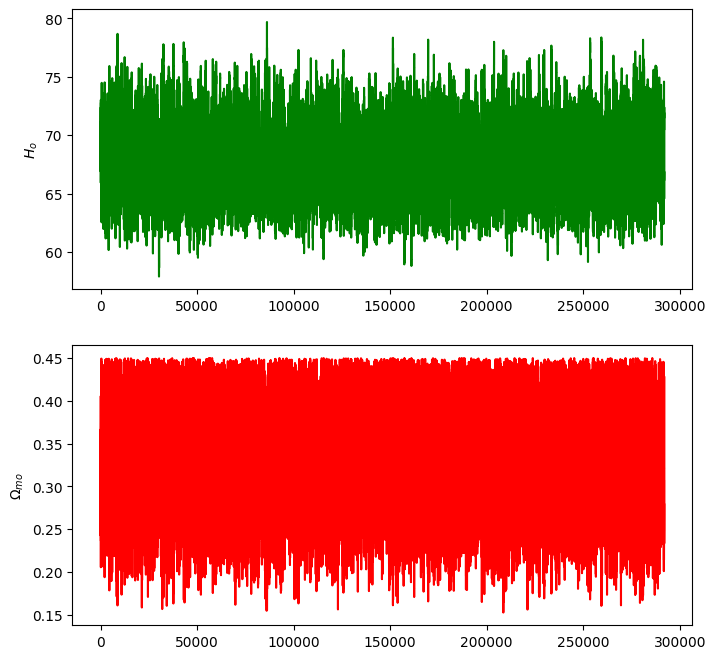

In [ ]:
fig, axes = plt.subplots(2, 1, figsize=(8, 8))
samples_b = samples_MH_b.T

# Plot the traceplot of H0
axes[0].plot(samples_b[0], "g")
axes[0].set_ylabel("$H_o$")

# Plot the traceplot of Om
axes[1].plot(samples_b[1], "r")
axes[1].set_ylabel("$\Omega_{mo}$")

In [ ]:
a_chain=samples_MH_b[:,0]
b_chain=samples_MH_b[:,1]
#Estimate the mean of H_o and omega_m chains
a_best = np.mean(a_chain)
b_best = np.mean(b_chain)

#Estimate the Std. Deviation of H_o and omega_m chains

sig_a = np.std(a_chain)
sig_b = np.std(b_chain)

print("Best fit values:")
print("H_o:",a_best, "Sig_H_o:", sig_a)
print("omega_m:",b_best, "Sig_omega_m:", sig_b)

Best fit values:
H_o: 67.99166348296693 Sig_H_o: 2.8752937409325985
omega_m: 0.32581162267203373 Sig_omega_m: 0.05403435543364464


Text(0, 0.5, 'Count')

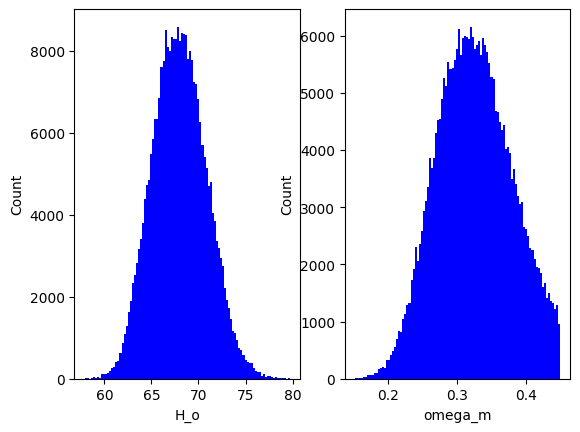

In [ ]:
# Plot the histogram of a
plt.subplot(1, 2, 1)
plt.hist(a_chain, bins=100, color='blue')
plt.xlabel('H_o')
plt.ylabel('Count')

# Plot the histogram of b
plt.subplot(1, 2, 2)
plt.hist(b_chain, bins=100, color='blue')
plt.xlabel('omega_m')
plt.ylabel('Count')

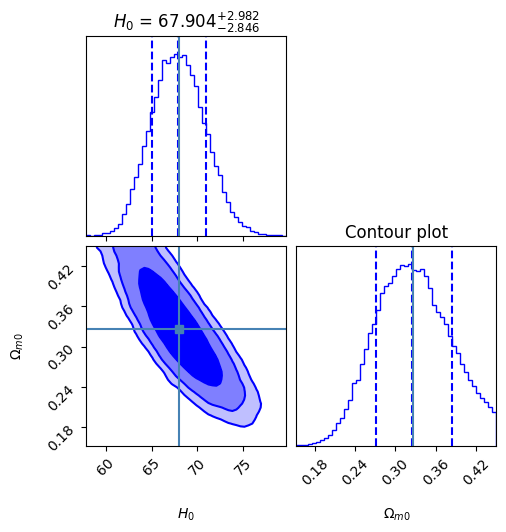

In [ ]:
fig = corner.corner(samples_MH,bins=50,color="b",labels=['$H_0$','$\Omega_{m0}$'],truths=[a_best,b_best],fill_contours=True,
                    levels=(0.68,0.95,0.99,),
                    smooth=True,
                    quantiles=[0.16, 0.5, 0.84],title_fmt='.3f',plot_datapoints=False,show_titles=True)

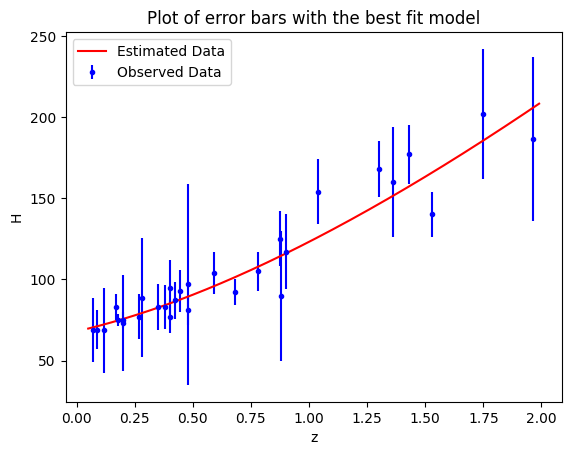

In [ ]:
plt.errorbar(z,H,Herr,fmt='b.', label = "Observed Data")
plt.xlabel('z')
plt.ylabel('H')
x = np.arange(0.05, 2.0, 0.01)
y = a_best + b_best * x
y = a_best * np.sqrt(b_best*(1+x)**3 + 1 - b_best)
plt.plot(x, y, color = "red", label = "Estimated Data")
plt.legend(loc = "upper left")
plt.title("Plot of error bars with the best fit model")
plt.show();